# Concrete Strength

In [12]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from statistics import mean
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
import statsmodels.api as sm
from statsmodels.formula.api import ols
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [13]:
df=pd.read_csv('concrete_data.csv')

In [14]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Missing values

<AxesSubplot:>

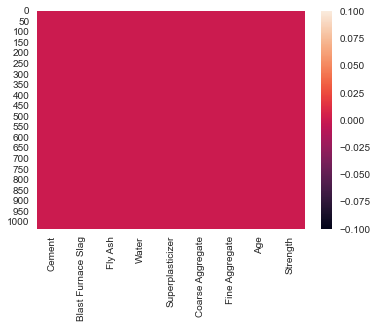

In [16]:
sns.heatmap(df.isnull())
# No missing values

# Outliers

<AxesSubplot:>

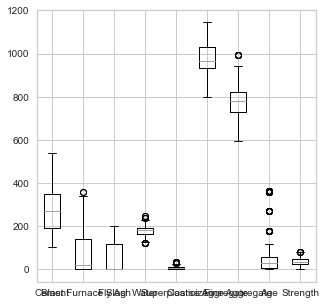

In [17]:
df.boxplot(figsize=[5,5])

In [18]:
def IQR_out(df):
    d1=df.quantile(0.25)
    d3=df.quantile(0.75)
    n=d3-d1
    o=df[((df<(d1-1.5*n))|(df>(d3+1.5*n)))]
    return o

In [19]:
print("Outliers in -> ")
print("Cement = "+str(len(IQR_out(df["Cement"]))))
print("Blast Furnace Slag = "+str(len(IQR_out(df["Blast Furnace Slag"]))))
print("Fly Ash = "+str(len(IQR_out(df["Fly Ash"]))))
print("Water = "+str(len(IQR_out(df["Water"]))))
print("Superplasticizer = "+str(len(IQR_out(df["Superplasticizer"]))))
print("Coarse Aggregrate = "+str(len(IQR_out(df["Coarse Aggregate"]))))
print("Fine Aggregrate = "+str(len(IQR_out(df["Fine Aggregate"]))))
print("Age = "+str(len(IQR_out(df["Age"]))))
print("Strength = "+str(len(IQR_out(df["Strength"]))))

Outliers in -> 
Cement = 0
Blast Furnace Slag = 2
Fly Ash = 0
Water = 9
Superplasticizer = 10
Coarse Aggregrate = 0
Fine Aggregrate = 5
Age = 59
Strength = 4


In [20]:
for c in df.columns[:-1]:
    d1=df[c].quantile(0.25)
    d3=df[c].quantile(0.75)
    i=d3-d1
    low=d1-1.5*i
    high=d3+1.5*i
    df.loc[(df[c]<low) | (df[c]>high),c]=df[c].mean()

<AxesSubplot:>

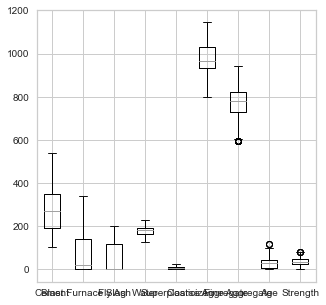

In [21]:
df.boxplot(figsize=[5,5])

In [11]:
print("Outliers in -> ")
print("Cement = "+str(len(IQR_out(df["Cement"]))))
print("Blast Furnace Slag = "+str(len(IQR_out(df["Blast Furnace Slag"]))))
print("Fly Ash = "+str(len(IQR_out(df["Fly Ash"]))))
print("Water = "+str(len(IQR_out(df["Water"]))))
print("Superplasticizer = "+str(len(IQR_out(df["Superplasticizer"]))))
print("Coarse Aggregate = "+str(len(IQR_out(df["Coarse Aggregate"]))))
print("Fine Aggregate = "+str(len(IQR_out(df["Fine Aggregate"]))))
print("Age = "+str(len(IQR_out(df["Age"]))))
print("Strength = "+str(len(IQR_out(df["Strength"]))))

Outliers in -> 
Cement = 0
Blast Furnace Slag = 0
Fly Ash = 0
Water = 0
Superplasticizer = 0
Coarse Aggregate = 0
Fine Aggregate = 30
Age = 3
Strength = 4


# Distplots
to see data variation

C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

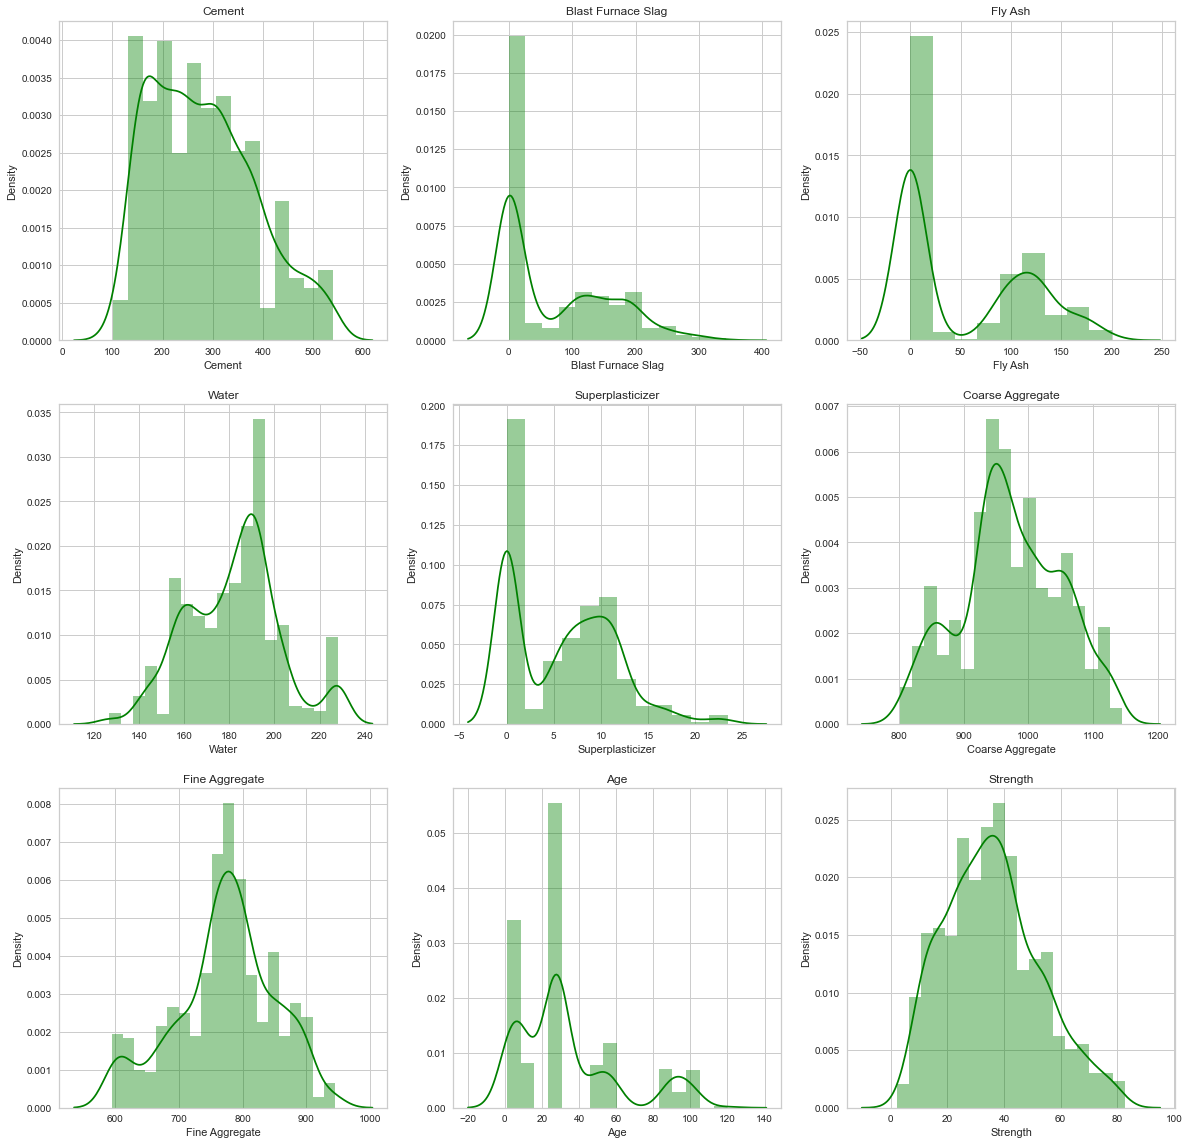

In [12]:
x=3
y=3
fig, ax = plt.subplots(x, y, figsize=(20,20))
col = 0
column = df.columns
for i in range(x):
    for j in range(y):
        sns.distplot(df[column[col]], color='green', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

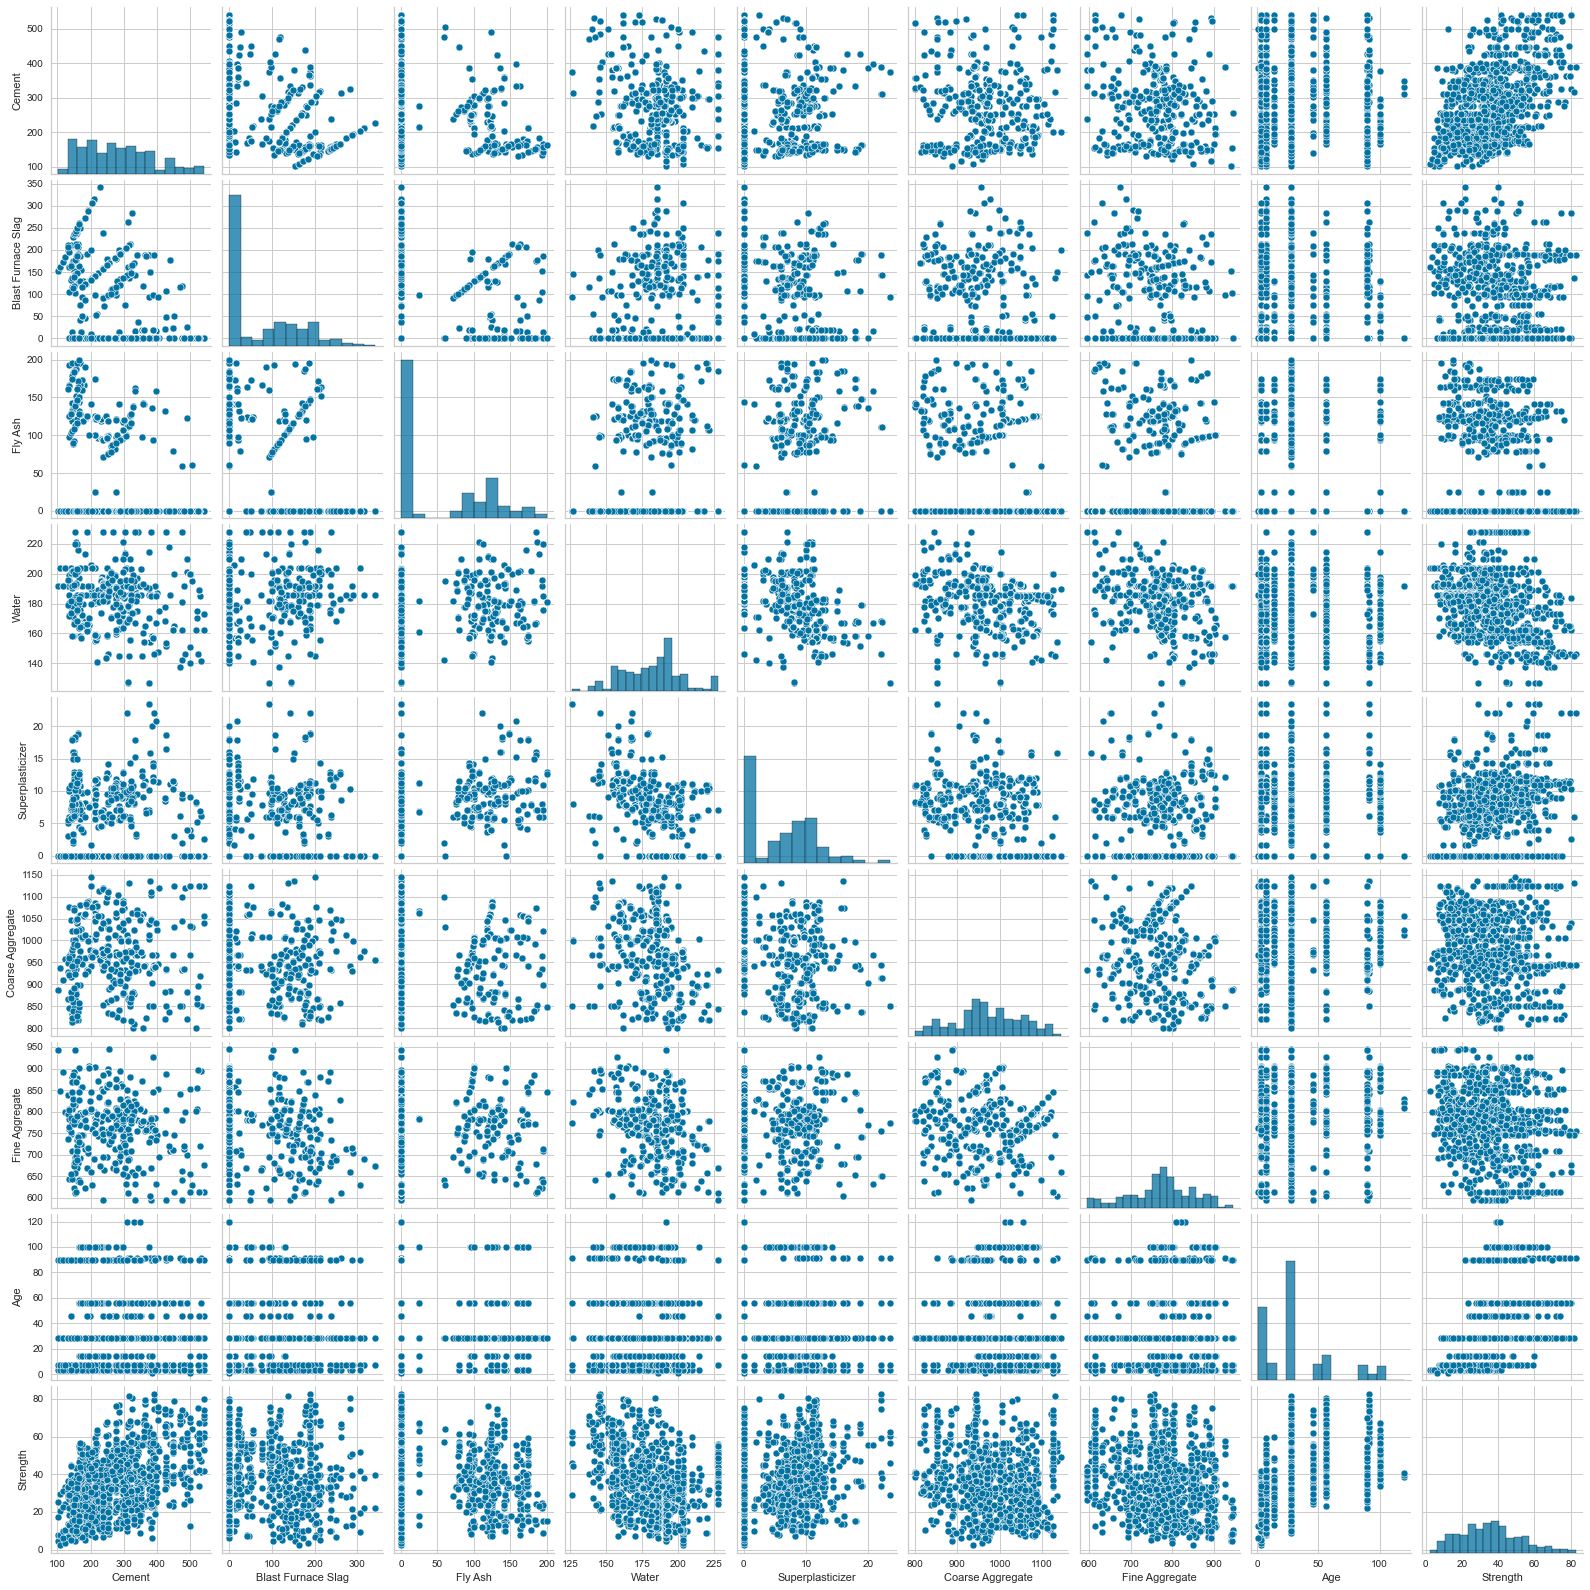

In [13]:
sns.pairplot(df)

# Correlation

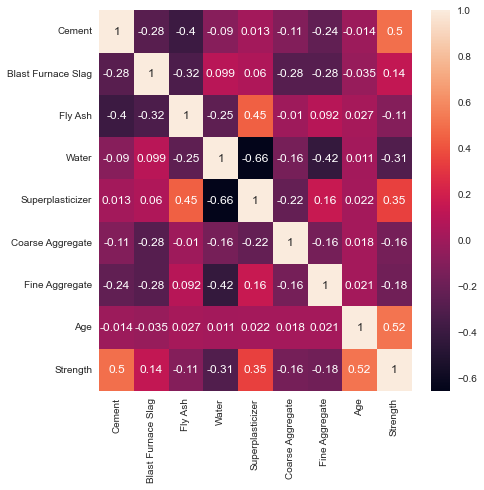

In [14]:
plt.figure(figsize=[7,7])
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.sav
# about 50% correlated which is fine(cement vs stength)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_Scaled=sc.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.20,random_state=1)

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train.shape

(824, 8)

In [19]:
X_test.shape

(206, 8)

In [20]:
y_train.shape

(824,)

In [21]:
y_test.shape

(206,)

# Models

# Linear

In [22]:
from sklearn.linear_model import LinearRegression
m1=LinearRegression()
m1.fit(X_train,y_train)
y_pred=m1.predict(X_test)

In [23]:
acr1=r2_score(y_test,y_pred)
acr1

0.6798071708451271

Text(0.5, 0.98, 'True vs Predicted')

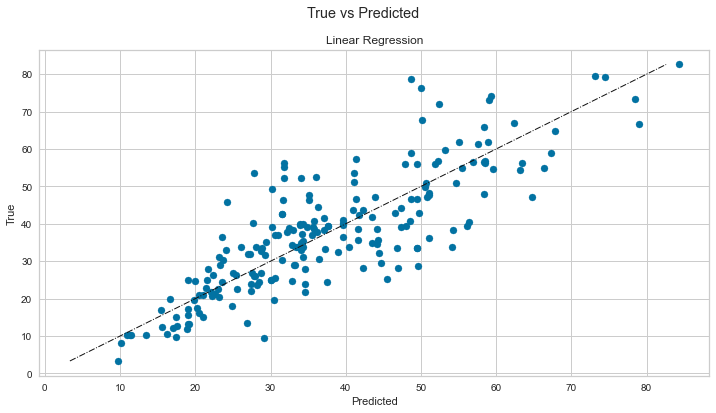

In [24]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 
fig.suptitle("True vs Predicted") 

In [25]:
m1.score(X_train,y_train)

0.7535648893248639

In [26]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  6.846391677985558
Mean Squared Error =  83.47253504325725
Root Mean Squared Logrithmic Error =  0.06416801396315962
Root Mean Squared Error =  9.136330502081087


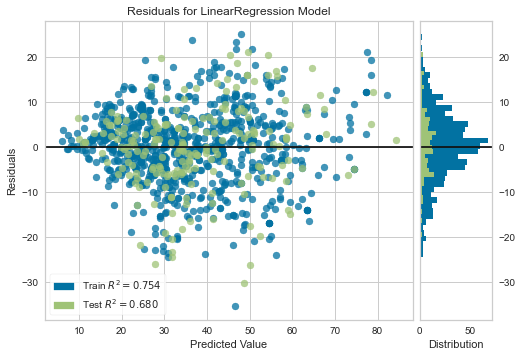

In [27]:
viz = residuals_plot(LinearRegression(), X_train, y_train, X_test, y_test)

In [32]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', LinearRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.7053
MAE: -84.9243
MSE: -11646.2602
RMSE: -107.9105


# Ridge

In [199]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)

In [200]:
acr2=r2_score(y_test,ridge_pred)
acr2

0.6801599648962985

In [201]:
ridge.score(X_train,y_train)

0.7535562807711665

In [202]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  4.25586569579288
Mean Squared Error =  47.36862153451995
Root Mean Squared Error =  6.882486580772966
Root Mean Squared Logrithmic Error =  0.039377398537149305


Text(0.5, 1.0, 'Ridge Regression')

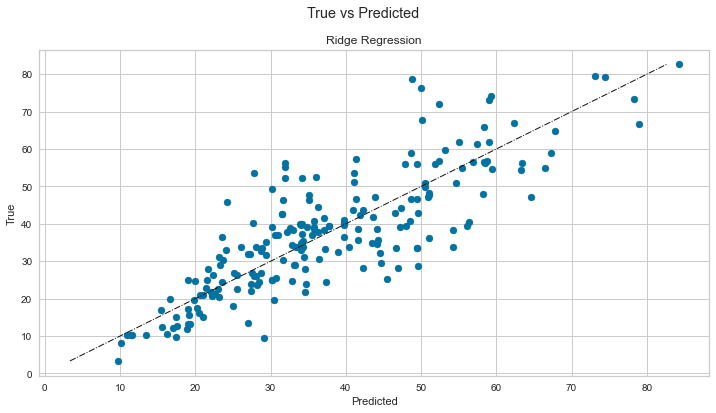

In [203]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(ridge_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
fig.suptitle("True vs Predicted") 
ax1.set_title("Ridge Regression") 

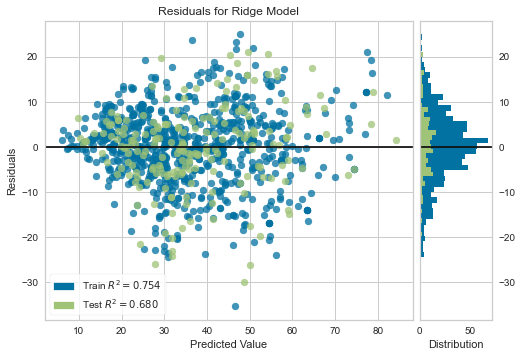

In [204]:
viz = residuals_plot(Ridge(), X_train, y_train, X_test, y_test)

In [205]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', ridge)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

Accuracy: 0.7053
MAE: -84.9637
MSE: -11646.6988
RMSE: -107.9123


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

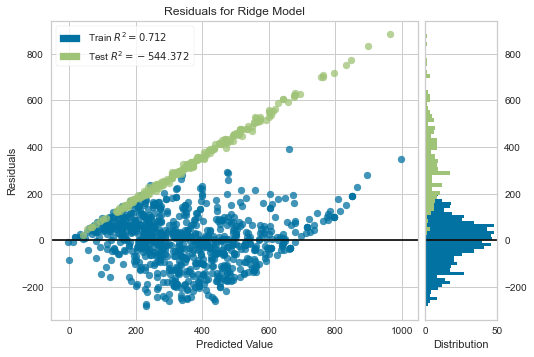

In [206]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# Lasso

In [207]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)

In [208]:
acr3=r2_score(y_test,lasso_pred)
acr3

0.6688660234541051

In [209]:
lasso.score(X_train,y_train)

0.7229819035732437

In [210]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  4.25586569579288
Mean Squared Error =  47.36862153451995
Root Mean Squared Error =  6.882486580772966
Root Mean Squared Logrithmic Error =  0.039377398537149305


Text(0.5, 1.0, 'Lasso Regression')

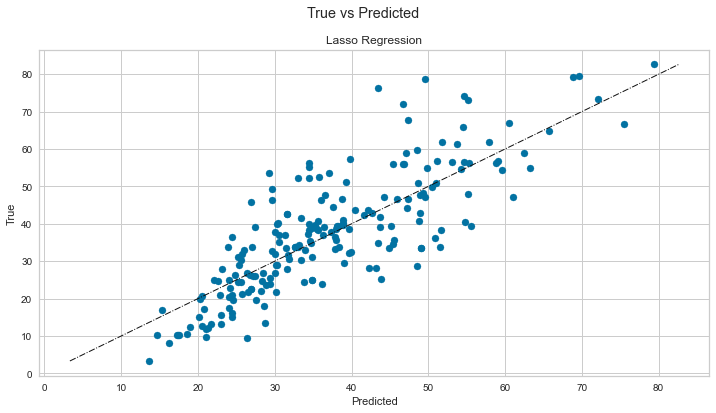

In [211]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(lasso_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
fig.suptitle("True vs Predicted") 
ax1.set_title("Lasso Regression") 

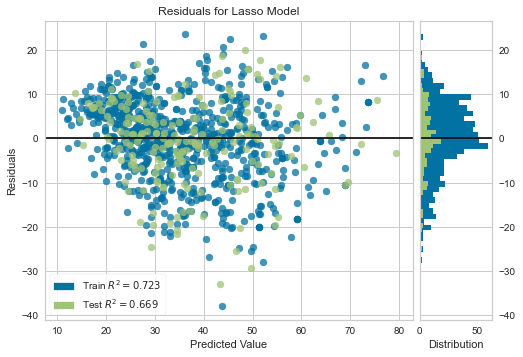

In [212]:
viz = residuals_plot(Lasso(), X_train, y_train, X_test, y_test)

In [213]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', lasso)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

Accuracy: 0.7053
MAE: -85.1552
MSE: -11651.5082
RMSE: -107.9331


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

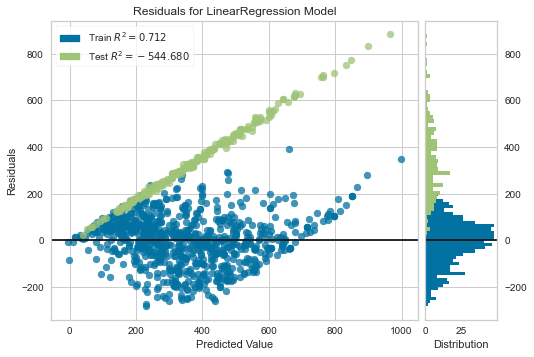

In [169]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# Polynomial

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
Poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
Poly_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [216]:
y_pred=Poly_model.predict(X_test)

In [217]:
acr4=r2_score(y_test,y_pred)
acr4

0.8071465354262243

In [218]:
Poly_model.score(X_train,y_train)

0.8795076655290448

In [219]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  5.436735544448642
Mean Squared Error =  50.27585290506835
Root Mean Squared Logrithmic Error =  0.035549983420798084
Root Mean Squared Error =  7.090546728219788


Text(0.5, 1.0, 'Polynomial Regression')

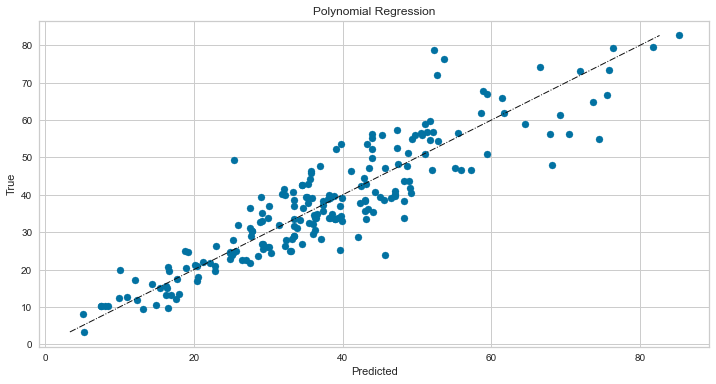

In [220]:
fig, ax1 = plt.subplots(1, figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Polynomial Regression") 

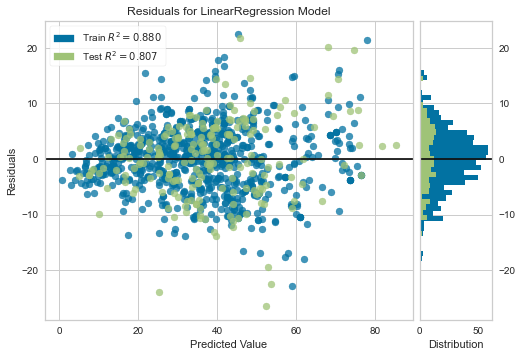

In [221]:
viz = residuals_plot(Poly_model, X_train, y_train, X_test, y_test)

In [222]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', Poly_model)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

Accuracy: 0.8091
MAE: -66.9820
MSE: -7563.3272
RMSE: -86.9391


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

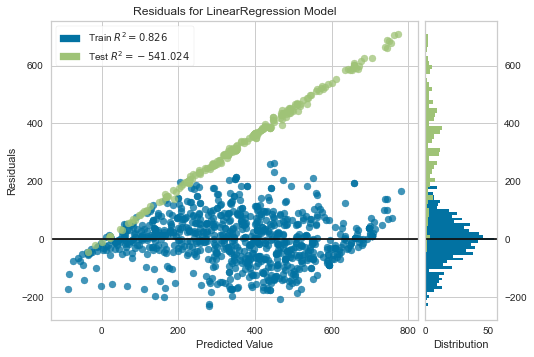

In [223]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# KNN

In [224]:
from sklearn.neighbors import KNeighborsRegressor

In [225]:
# finding k
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

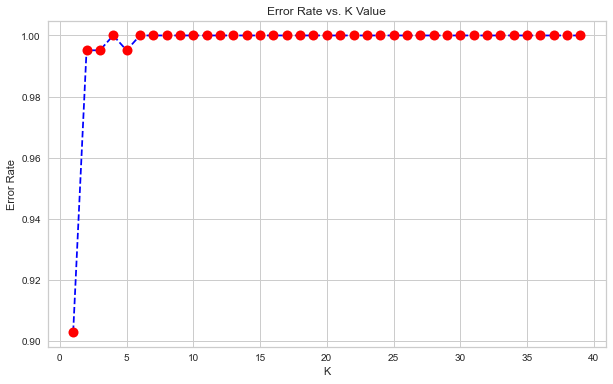

In [226]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [227]:
#k=3
m6=KNeighborsRegressor(n_neighbors=3)
m6.fit(X_train,y_train)
y_pred=m6.predict(X_test)

In [228]:
m6.score(X_train,y_train)

0.9157190001609454

In [229]:
m6.score(X_test,y_test)

0.7552823110624256

In [230]:
acr6=metrics.r2_score(y_test,y_pred)
acr6

0.7552823110624256

In [231]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  5.50957928802589
Mean Squared Error =  63.796575080906145
Root Mean Squared Error =  7.987275823514933
Root Mean Squared Logrithmic Error =  0.044967714239269235


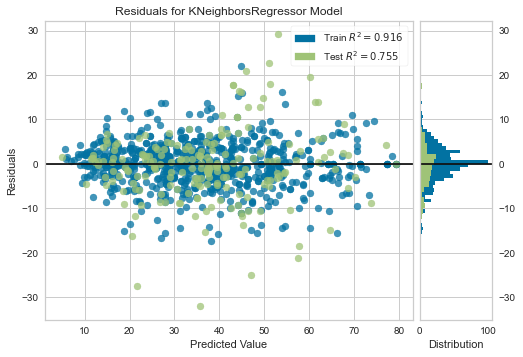

In [232]:
viz = residuals_plot(m6, X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

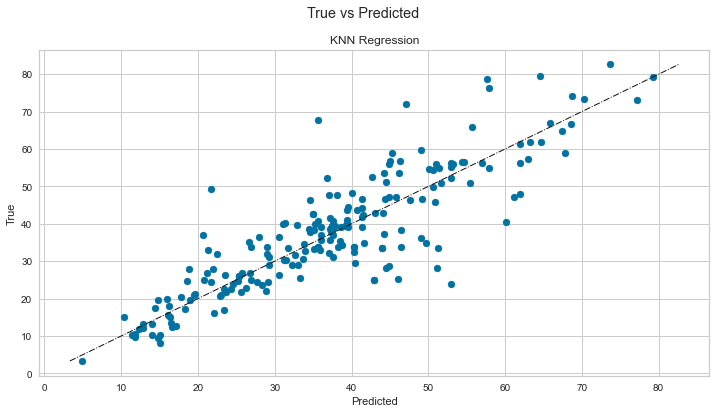

In [233]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("KNN Regression") 
fig.suptitle("True vs Predicted") 

In [234]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', m6)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

Accuracy: 0.7490
MAE: -74.4962
MSE: -9999.7386
RMSE: -99.8072


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

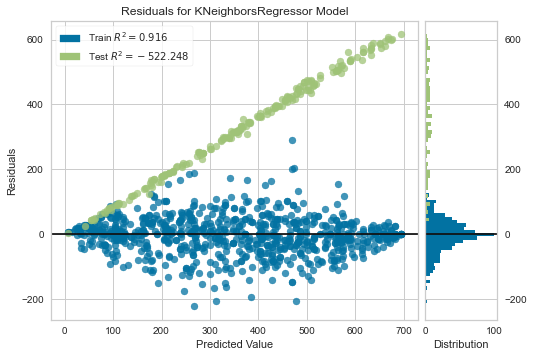

In [235]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# Decision Tree

In [245]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)
y_pred=dt_model.predict(X_test)

In [246]:
acr7=r2_score(y_test,y_pred)
acr7

0.8297289738246808

In [247]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  4.182305825242719
Mean Squared Error =  44.38873361650486
Root Mean Squared Error =  6.662487044378012
Root Mean Squared Logrithmic Error =  0.0384064735518518


Text(0.5, 1.0, 'Decision Tree')

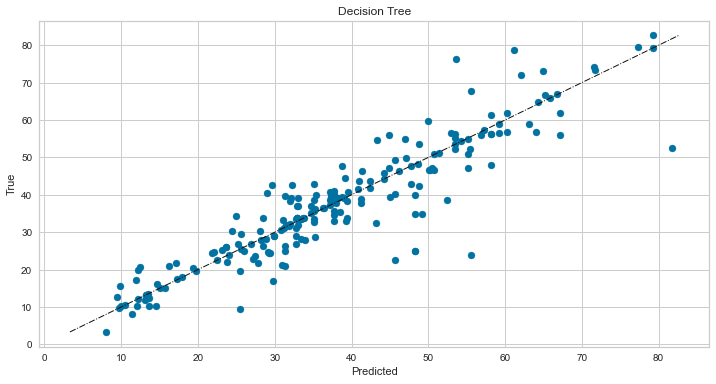

In [248]:
fig, ax1 = plt.subplots(1, figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Decision Tree") 

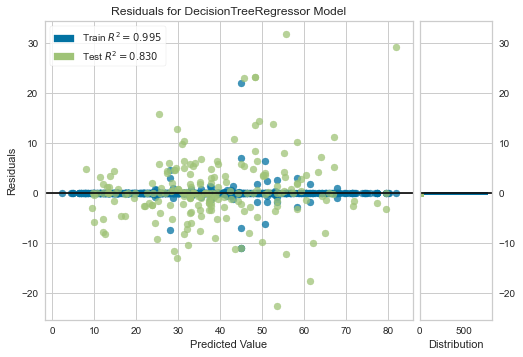

In [249]:
viz = residuals_plot(dt_model, X_train, y_train, X_test, y_test)

In [250]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', dt_model)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

Accuracy: 0.6336
MAE: -82.2352
MSE: -14586.7052
RMSE: -119.6251


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

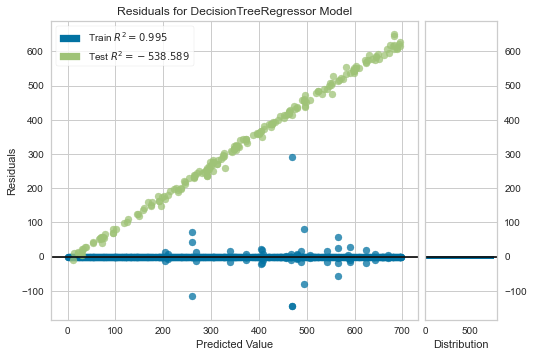

In [251]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# Random Forest

In [260]:
from sklearn.ensemble import RandomForestRegressor
m8=RandomForestRegressor(n_estimators=1500)
m8.fit(X_train,y_train)
y_pred=m8.predict(X_test)

In [261]:
from sklearn import metrics
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  3.655758834041976
Mean Squared Error =  28.133060505239847
Root Mean Squared Error =  5.304060756179161
Root Mean Squared Logrithmic Error =  0.022732114892178114


In [262]:
m8.score(X_train,y_train)

0.9850576370464694

In [263]:
m8.score(X_test,y_test)

0.8920842139119194

In [264]:
acr8=metrics.r2_score(y_test,y_pred)
acr8

0.8920842139119194

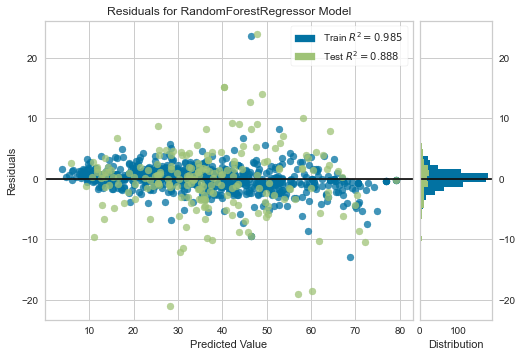

In [265]:
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

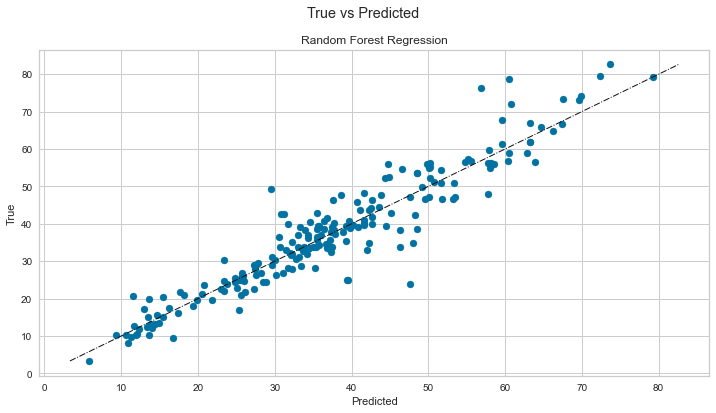

In [266]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Random Forest Regression") 
fig.suptitle("True vs Predicted") 

In [267]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', m8)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.8056
MAE: -66.0637
MSE: -7797.7216
RMSE: -87.7636


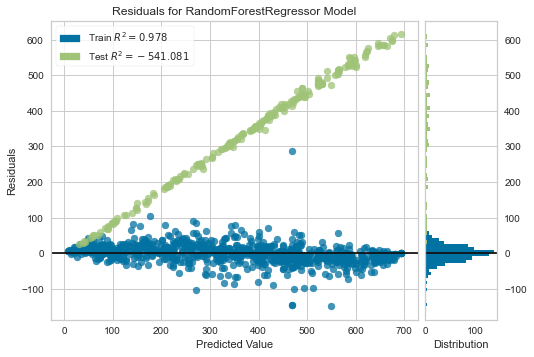

In [268]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# GBR

In [274]:
from sklearn.ensemble import GradientBoostingRegressor
m9=GradientBoostingRegressor(n_estimators=2000)
m9.fit(X_train,y_train)
y_pred=m9.predict(X_test)

In [275]:
m9.score(X_train,y_train)

0.9938532773552637

In [276]:
m9.score(X_test,y_test)

0.9101137019850376

In [277]:
acr9=metrics.r2_score(y_test,y_pred)
acr9

0.9101137019850376

In [278]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  3.3671510458649814
Mean Squared Error =  23.43287068847346
Root Mean Squared Error =  4.840751045909453
Root Mean Squared Logrithmic Error =  0.02233248111932905


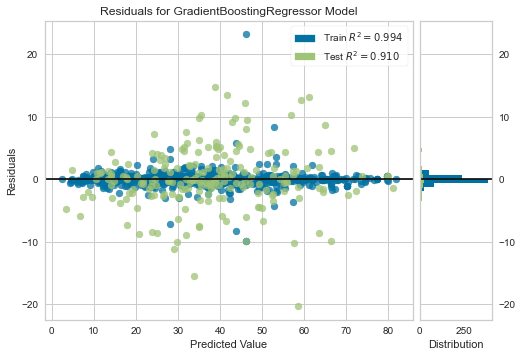

In [279]:
viz = residuals_plot(m9, X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

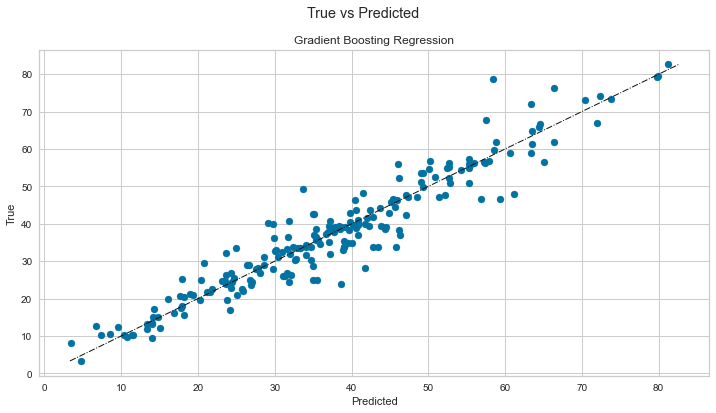

In [280]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Gradient Boosting Regression") 
fig.suptitle("True vs Predicted") 

In [281]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', m9)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.8173
MAE: -59.4820
MSE: -7374.2801
RMSE: -85.2607


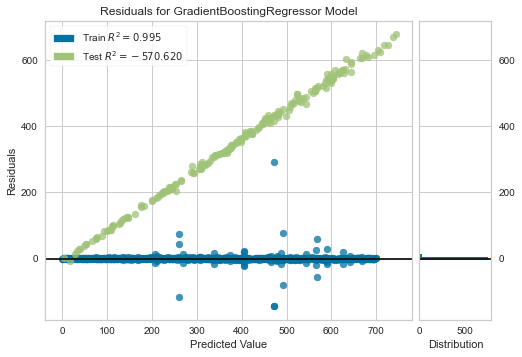

In [282]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# ADA Boosting Regressor

In [283]:
from sklearn.ensemble import AdaBoostRegressor
m10=AdaBoostRegressor()
m10.fit(X_train,y_train)
y_pred=m10.predict(X_test)

In [284]:
m10.score(X_train,y_train)

0.8300482612307912

In [285]:
m10.score(X_test,y_test)

0.763289225439727

In [286]:
acr10=metrics.r2_score(y_test,y_pred)
acr10

0.763289225439727

In [287]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  6.285949386367595
Mean Squared Error =  61.709215902027175
Root Mean Squared Error =  7.855521364112453
Root Mean Squared Logrithmic Error =  0.06859339745685974


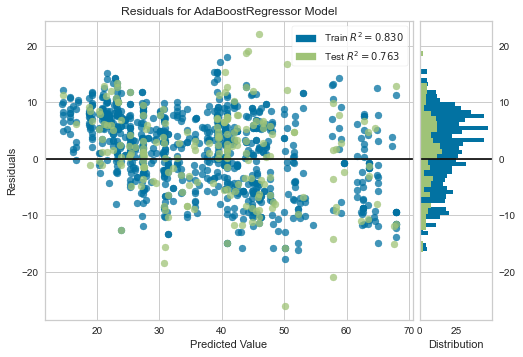

In [288]:
viz = residuals_plot(m10, X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

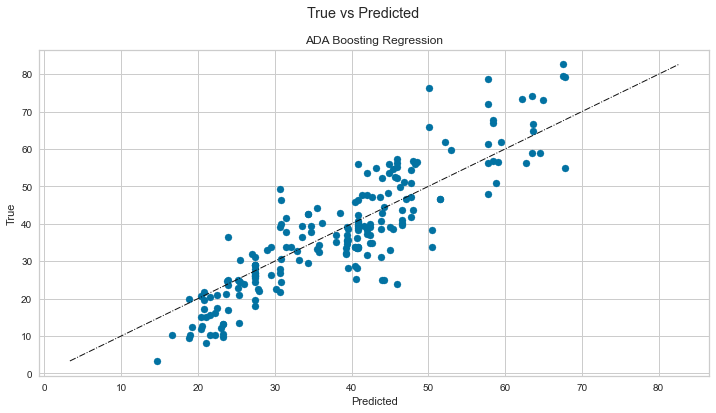

In [289]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("ADA Boosting Regression") 
fig.suptitle("True vs Predicted") 

In [290]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', m10)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.7186
MAE: -88.9182
MSE: -11266.9495
RMSE: -106.6484


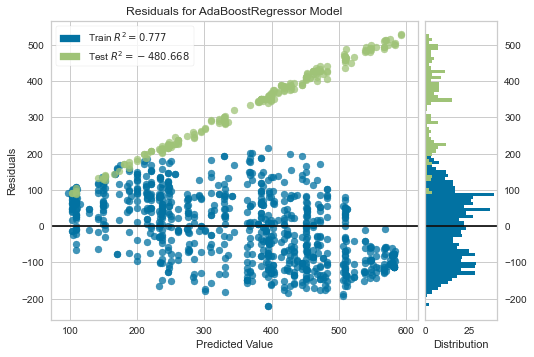

In [291]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# SVM

In [295]:
from sklearn.svm import SVR
m11=SVR(kernel='linear')
m11.fit(X_train,y_train)
y_pred=m11.predict(X_test)

In [296]:
m11.score(X_train,y_train)

0.7506508438010663

In [297]:
m11.score(X_test,y_test)

0.6734175518009226

In [298]:
acr11=metrics.r2_score(y_test,y_pred)
acr11

0.6734175518009226

In [299]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  6.928981737150726
Mean Squared Error =  85.1382740949037
Root Mean Squared Error =  9.227040375705727
Root Mean Squared Logrithmic Error =  0.0647265982780109


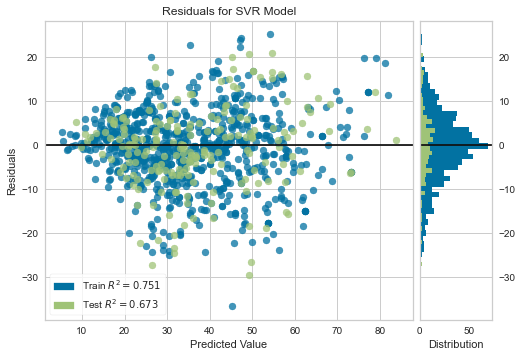

In [300]:
viz = residuals_plot(m11, X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

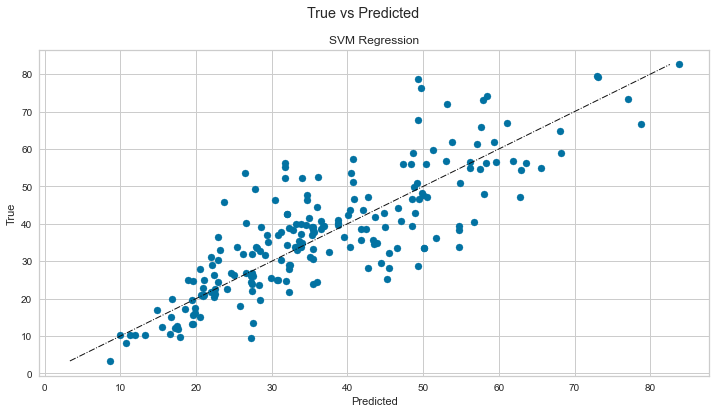

In [301]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("SVM Regression") 
fig.suptitle("True vs Predicted") 

In [302]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m',m11)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.6846
MAE: -90.6357
MSE: -12504.0547
RMSE: -111.7724


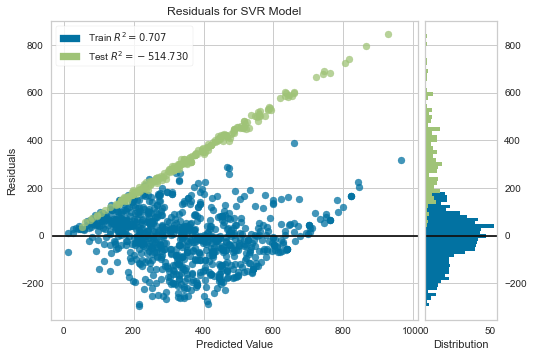

In [303]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# XGBoost

In [310]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr=XGBRegressor()
xgr.fit(X_train,y_train)
y_pred=xgr.predict(X_test)

In [311]:
xgr.score(X_train,y_train)

0.9948499764986632

In [312]:
xgr.score(X_test,y_test)

0.920677046183015

In [313]:
acr12=metrics.r2_score(y_test,y_pred)
acr12

0.920677046183015

In [314]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  2.9866871936112935
Mean Squared Error =  20.679064111770998
Root Mean Squared Error =  4.547423898403468
Root Mean Squared Logrithmic Error =  0.016949412897346236


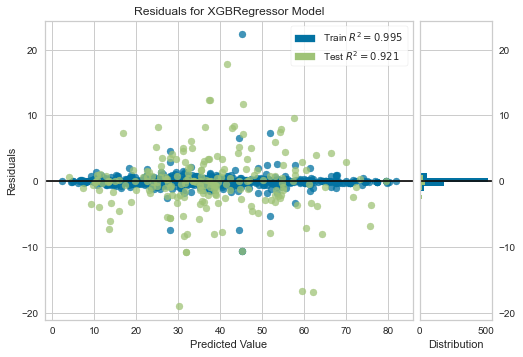

In [315]:
viz = residuals_plot(xgr, X_train, y_train, X_test, y_test)

Text(0.5, 0.98, 'True vs Predicted')

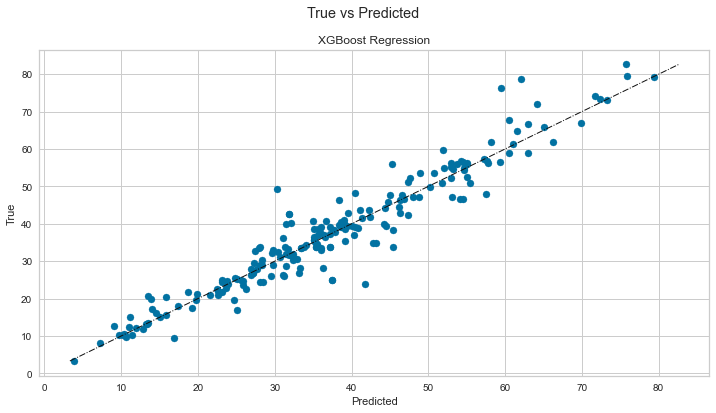

In [316]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("XGBoost Regression") 
fig.suptitle("True vs Predicted") 

In [317]:
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y_train)
steps = [('pca', PCA(n_components=6)), ('m', xgr)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, new_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
mae_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
mse_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
rmse_scores = cross_val_score(model, X_train, new_y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
#rmsle_scores = cross_val_score(model, X_train, new_y, scoring='neg_mean_squared_log_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.4f' % (mean(n_scores)))
print('MAE: %.4f' % (mean(mae_scores)))
print('MSE: %.4f' % (mean(mse_scores)))
print('RMSE: %.4f' % (mean(rmse_scores)))
#print('Accuracy: %.4f' % (mean(rmsle_scores)))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-pa

Accuracy: 0.8121
MAE: -60.8086
MSE: -7581.8524
RMSE: -86.2034


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


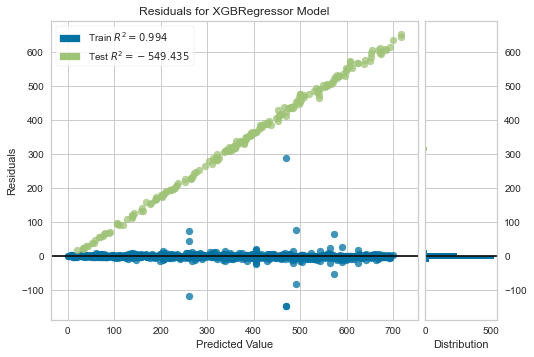

In [318]:
viz = residuals_plot(model, X_train, new_y, X_test, y_test)

# ANN

In [129]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers , callbacks

In [131]:
m12 = keras.Sequential([
    layers.Dense(40 , activation = 'relu' , input_shape = [X_Scaled.shape[1]]),
    layers.Dense(50 , activation = 'relu'),
    layers.Dense(60 , activation = 'relu'),
    layers.Dense(1 , activation = 'linear')
])

In [132]:
m12.compile(optimizer='Adam', loss = 'mean_squared_error' , )
history = m12.fit(X_train,y_train,batch_size=60 , epochs=350 , validation_split=.1,verbose = 1)

Epoch 1/350
13/13 [==============================] - 1s 14ms/step - loss: 1494.4924 - val_loss: 1521.5878
Epoch 2/350
13/13 [==============================] - 0s 4ms/step - loss: 1420.7271 - val_loss: 1420.0177
Epoch 3/350
13/13 [==============================] - 0s 3ms/step - loss: 1281.2128 - val_loss: 1217.5481
Epoch 4/350
13/13 [==============================] - 0s 3ms/step - loss: 1014.0186 - val_loss: 860.7656
Epoch 5/350
13/13 [==============================] - 0s 3ms/step - loss: 631.2946 - val_loss: 440.2143
Epoch 6/350
13/13 [==============================] - 0s 4ms/step - loss: 320.8992 - val_loss: 244.3040
Epoch 7/350
13/13 [==============================] - 0s 4ms/step - loss: 231.7285 - val_loss: 186.6951
Epoch 8/350
13/13 [==============================] - 0s 3ms/step - loss: 179.7338 - val_loss: 159.6191
Epoch 9/350
13/13 [==============================] - 0s 4ms/step - loss: 154.9726 - val_loss: 140.4048
Epoch 10/350
13/13 [==============================] - 0s 5ms/step

Epoch 81/350
13/13 [==============================] - 0s 6ms/step - loss: 29.1841 - val_loss: 30.0503
Epoch 82/350
13/13 [==============================] - 0s 6ms/step - loss: 28.8976 - val_loss: 29.9722
Epoch 83/350
13/13 [==============================] - 0s 7ms/step - loss: 28.4113 - val_loss: 30.1170
Epoch 84/350
13/13 [==============================] - 0s 5ms/step - loss: 28.2320 - val_loss: 29.7730
Epoch 85/350
13/13 [==============================] - 0s 6ms/step - loss: 28.2983 - val_loss: 29.5216
Epoch 86/350
13/13 [==============================] - 0s 5ms/step - loss: 28.0784 - val_loss: 31.5581
Epoch 87/350
13/13 [==============================] - 0s 7ms/step - loss: 27.5140 - val_loss: 28.5923
Epoch 88/350
13/13 [==============================] - 0s 6ms/step - loss: 27.4112 - val_loss: 30.2701
Epoch 89/350
13/13 [==============================] - 0s 5ms/step - loss: 27.0901 - val_loss: 29.8261
Epoch 90/350
13/13 [==============================] - 0s 5ms/step - loss: 26.6968 

13/13 [==============================] - 0s 5ms/step - loss: 13.9471 - val_loss: 26.3051
Epoch 240/350
13/13 [==============================] - 0s 5ms/step - loss: 13.9486 - val_loss: 26.6172
Epoch 241/350
13/13 [==============================] - 0s 4ms/step - loss: 13.6190 - val_loss: 27.4032
Epoch 242/350
13/13 [==============================] - 0s 4ms/step - loss: 13.6709 - val_loss: 26.4267
Epoch 243/350
13/13 [==============================] - 0s 4ms/step - loss: 13.2015 - val_loss: 26.9243
Epoch 244/350
13/13 [==============================] - 0s 4ms/step - loss: 13.0665 - val_loss: 27.1024
Epoch 245/350
13/13 [==============================] - 0s 4ms/step - loss: 13.6010 - val_loss: 29.4170
Epoch 246/350
13/13 [==============================] - 0s 4ms/step - loss: 13.8081 - val_loss: 28.5184
Epoch 247/350
13/13 [==============================] - 0s 4ms/step - loss: 13.3416 - val_loss: 26.7929
Epoch 248/350
13/13 [==============================] - 0s 4ms/step - loss: 13.0751 - va

In [133]:
y_pred = m12.predict(X_test)
r2_score(y_test,y_pred)

0.8403021666130511

Text(0.5, 0.98, 'True vs Predicted')

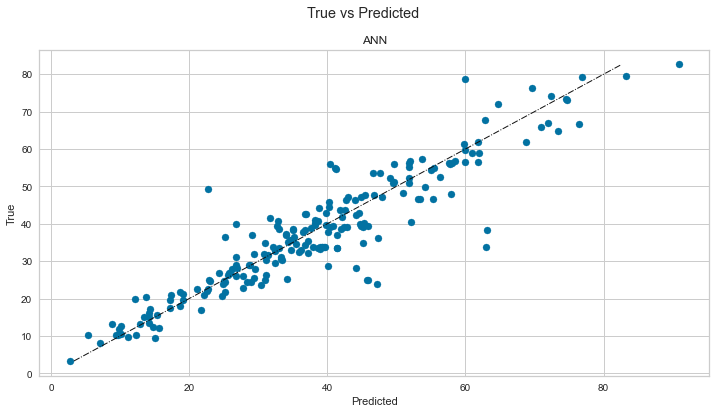

In [134]:
fig, (ax1) = plt.subplots(1,figsize=(12,6)) 
ax1.scatter(y_pred, y_test) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-.', lw=1) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("ANN") 
fig.suptitle("True vs Predicted") 

In [135]:
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error = ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Logrithmic Error = ', metrics.mean_squared_log_error(y_test, y_pred,squared=True))

Mean Absolute Error =  4.343561676219829
Mean Squared Error =  41.632359565668544
Root Mean Squared Error =  6.452314279827707
Root Mean Squared Logrithmic Error =  0.0312871527642784
